In [29]:
import numpy as np
import matplotlib.pyplot as plt

### Part d

In [32]:
def f(x, r):
    return r * np.sin(np.pi * x)

def f_prime(x, r):
    return r * np.pi * np.cos(np.pi * x)

def run_simulation(r, x0=0.5, warmup=10000, record=1000):
    x = x0
    # Warmup phase
    for _ in range(warmup):
        x = f(x, r)

    # Record next values
    results = []
    for _ in range(record):
        x = f(x, r)
        results.append(x)

    return np.array(results)

# Run for r = 0.4 and r = 0.71
for r in [0.4, 0.71]:
    xs = run_simulation(r)
    x_star = np.mean(xs[-100:])  # Take average of last 100 to approximate fixed point
    derivative = f_prime(x_star, r)

    print(f"r = {r}")
    print(f"Estimated fixed point x* ≈ {x_star:.6f}")
    print(f"f'(x*) ≈ {derivative:.6f}")
    print(f"Max deviation in last 100 values: {np.max(np.abs(xs[-100:] - x_star)):.2e}")
    print("-" * 40)

r = 0.4
Estimated fixed point x* ≈ 0.364088
f'(x*) ≈ 0.520402
Max deviation in last 100 values: 0.00e+00
----------------------------------------
r = 0.71
Estimated fixed point x* ≈ 0.641242
f'(x*) ≈ -0.957584
Max deviation in last 100 values: 1.89e-15
----------------------------------------


### Part e

In [33]:
def detect_cycles(r, x0=0.5, warmup=10000, record=1000, tol=1e-6):
    x = x0
    # Warmup phase
    for _ in range(warmup):
        x = f(x, r)
    
    # Record values as numpy array
    history = np.zeros(record)
    for i in range(record):
        x = f(x, r)
        history[i] = x
    
    # Detect cycle length
    for m in [2, 4, 8, 16, 32]:  # Check common cycle lengths
        if 2*m > len(history):
            continue
        deviations = np.abs(history[-m:] - history[-2*m:-m])
        if np.all(deviations < tol):
            return m, history[-m:]
    return None, history[-32:]  # Default return last 32 if no cycle found

# Run for r = 0.74
r = 0.74
cycle_length, cycle_values = detect_cycles(r)
print(f"r = {r}")
if cycle_length:
    print(f"Converged to {cycle_length}-cycle: {cycle_values}")
else:
    print("No clear cycle detected in checked periods")

r = 0.74
Converged to 2-cycle: [0.72710552 0.55950917]


### Part f

In [35]:
# Test values of r
r_values = [0.84, 0.86, 0.865, 0.8654]
results = {}

for r in r_values:
    history = run_simulation(r)
    cycle_length = detect_cycle_length(history)
    results[r] = {
        'cycle_length': cycle_length,
        'cycle_values': np.unique(np.round(history[-cycle_length:], 6)) if cycle_length else None
    }
    print(f"r = {r:.4f} → {cycle_length}-cycle: {results[r]['cycle_values']}")
    print("-" * 40)

r = 0.8400 → 4-cycle: [0.407069 0.484181 0.804455 0.838963]
----------------------------------------
r = 0.8600 → 8-cycle: [0.366629 0.379864 0.506647 0.536428 0.785607 0.799473 0.854375 0.859812]
----------------------------------------
r = 0.8650 → 16-cycle: [0.356003 0.359677 0.378663 0.388214 0.481235 0.502011 0.546538 0.555572
 0.777989 0.782302 0.802912 0.812205 0.851851 0.855772 0.863497 0.864983]
----------------------------------------
r = 0.8654 → 32-cycle: [0.355133 0.355637 0.358852 0.360172 0.376235 0.37936  0.387913 0.389374
 0.478164 0.481246 0.499862 0.506899 0.544818 0.548051 0.555986 0.557237
 0.777312 0.777913 0.781703 0.783236 0.800804 0.803986 0.812298 0.81366
 0.851447 0.852049 0.855558 0.856836 0.863365 0.863898 0.865197 0.8654  ]
----------------------------------------


### Part g

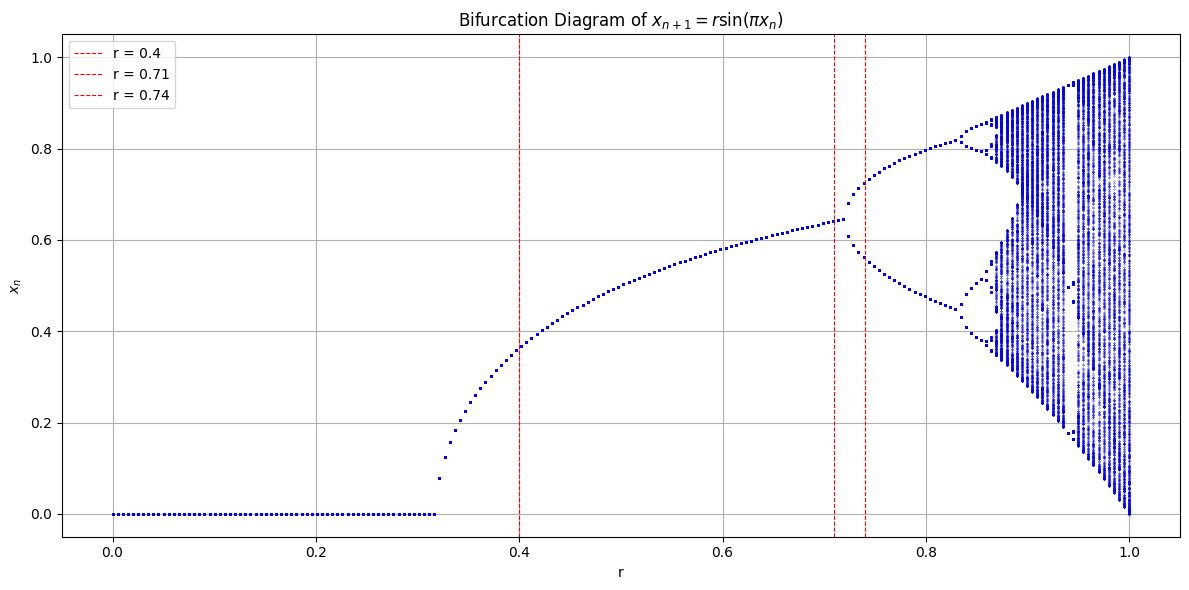

In [39]:
import matplotlib.pyplot as plt

# Generate 200 equispaced r values in [0, 1]
r_space = np.linspace(0, 1, 200)
x0 = 0.5
warmup = 10000
record = 1000

# Initialize plot data
r_list = []
x_list = []

# Compute bifurcation data
for r in r_space:
    x = x0
    for _ in range(warmup):
        x = f(x, r)
    for _ in range(record):
        x = f(x, r)
        r_list.append(r)
        x_list.append(x)

# Plot bifurcation diagram
plt.figure(figsize=(12, 6))
plt.plot(r_list, x_list, 'b.', markersize=0.5)

# Highlight r values from parts d) and e)
highlight_r = [0.4, 0.71, 0.74]
for r_val in highlight_r:
    plt.axvline(x=r_val, color='red', linestyle='--', linewidth=0.8, label=f"r = {r_val}")

plt.xlabel("r")
plt.ylabel("$x_n$")
plt.title("Bifurcation Diagram of $x_{n+1} = r \\sin(\\pi x_n)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Q10_g.png")
plt.show()

### Part h

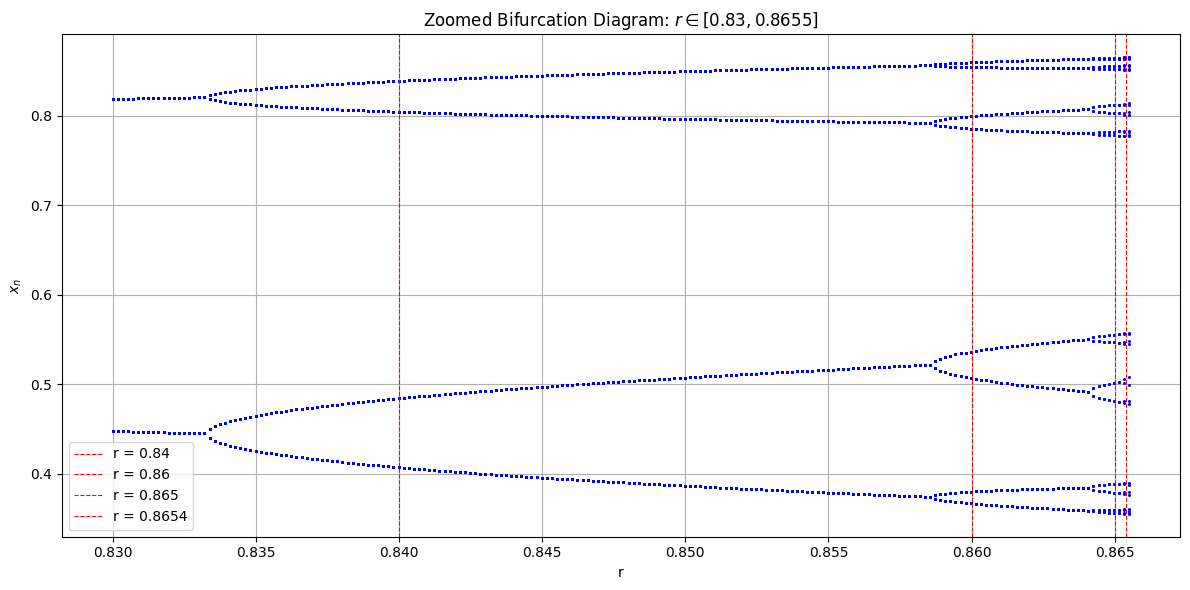

In [40]:
# Refined r range for zoomed-in bifurcation diagram
r_zoom = np.linspace(0.83, 0.8655, 200)
x0 = 0.5
warmup = 10000
record = 1000

# Data storage
r_list_zoom = []
x_list_zoom = []

# Compute zoomed-in bifurcation data
for r in r_zoom:
    x = x0
    for _ in range(warmup):
        x = f(x, r)
    for _ in range(record):
        x = f(x, r)
        r_list_zoom.append(r)
        x_list_zoom.append(x)

# Plot zoomed-in bifurcation diagram
plt.figure(figsize=(12, 6))
plt.plot(r_list_zoom, x_list_zoom, 'b.', markersize=0.5)

# Highlight r values from part (f)
highlight_f = [0.84, 0.86, 0.865, 0.8654]
for r_val in highlight_f:
    plt.axvline(x=r_val, color='red', linestyle='--', linewidth=0.8, label=f"r = {r_val}")

plt.xlabel("r")
plt.ylabel("$x_n$")
plt.title("Zoomed Bifurcation Diagram: $r \\in [0.83, 0.8655]$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Q10_h.png")
plt.show()